<a href="https://colab.research.google.com/github/jstangelbellarmine/MLA_JRS/blob/main/FinalProject_Regression_JRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Final Project, Regression

###CS-430-ON

John Stangel

##Ensemble Methods

All Imports brought in from Assignment 5's notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This section confirms I have all files needed

In [3]:
import os
os.listdir('/content/drive/MyDrive')

['Colab Notebooks',
 'weather_2012.csv',
 'Untitled document.gdoc',
 'March 2025 (6 Calendar Page).gdoc',
 'GaiaEye.zip',
 'buckthornImg.jpg',
 'Steel_industry_data.csv',
 'banknote_authentication.csv',
 'Untitled0.ipynb',
 'SkokieBuckthorn.jpg',
 'SkokieB.JPG',
 'Google Earth',
 'landsat_train.csv',
 'landsat_test.csv',
 'Malta.gdoc',
 'AirQualityUCI.csv',
 'iris.zip',
 'letter+recognition.zip',
 'best.pt',
 'Gaia_Eye_Train_Test.ipynb',
 'Gaia_Eye_Detection_Mapping.ipynb',
 'Drone1.jpg',
 'TestImages',
 'Gaia_Eye_Detector.ipynb',
 'FotoMapper.ipynb',
 'photo_location.kml',
 'FinalProject_Regression_JRS.ipynb']

Imports for Ensemble Learning and Random Forests


##Imports for specific models, from [starter code](https://github.com/r2klabs/CS430Repository.git) provided by Bellarmine University.

This section imports the models from SKLearn.

In [4]:
from sklearn.svm import SVC, SVR
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

##Other Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


###Imports for Splitting Data and Building Pipeline


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn import set_config
set_config(display='diagram')

###Imports for Performance Measures

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

###Confusion Matrix Function

This function is for creating a graphical version of the confusion matrix.

In [9]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

ROC_Curve Function
This function is for plotting the roc_curve

In [10]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

This section imports the code needed for data trees.

In [11]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

##Problem 1 | Regression

I chose to use [this](https://archive.ics.uci.edu/dataset/360/air+quality) air quality data set from UCI.

This section selects the correct file

In [12]:
file_path = "/content/drive/MyDrive/AirQualityUCI.csv"

This section creates a data frame

In [13]:
df = pd.read_csv(file_path, sep=";", decimal=",", engine="python")

This section removes almost-empty columns, which my dataset has and was causing problems.



In [14]:
df = df.dropna(axis=1, thresh=len(df) * 0.9)

I was having trouble running my project, so this section helps modify my columns and make them usable by the regression algorithm.

In [15]:
df.columns = [col.strip() for col in df.columns]
df = df[df['CO(GT)'].notna()]

This section summarizes the content of the file

In [16]:
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nSummary statistics:")
print(df.describe())

Shape of dataset: (9357, 15)

Column names: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

Summary statistics:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count

This section creates a visual heatmap of the data,

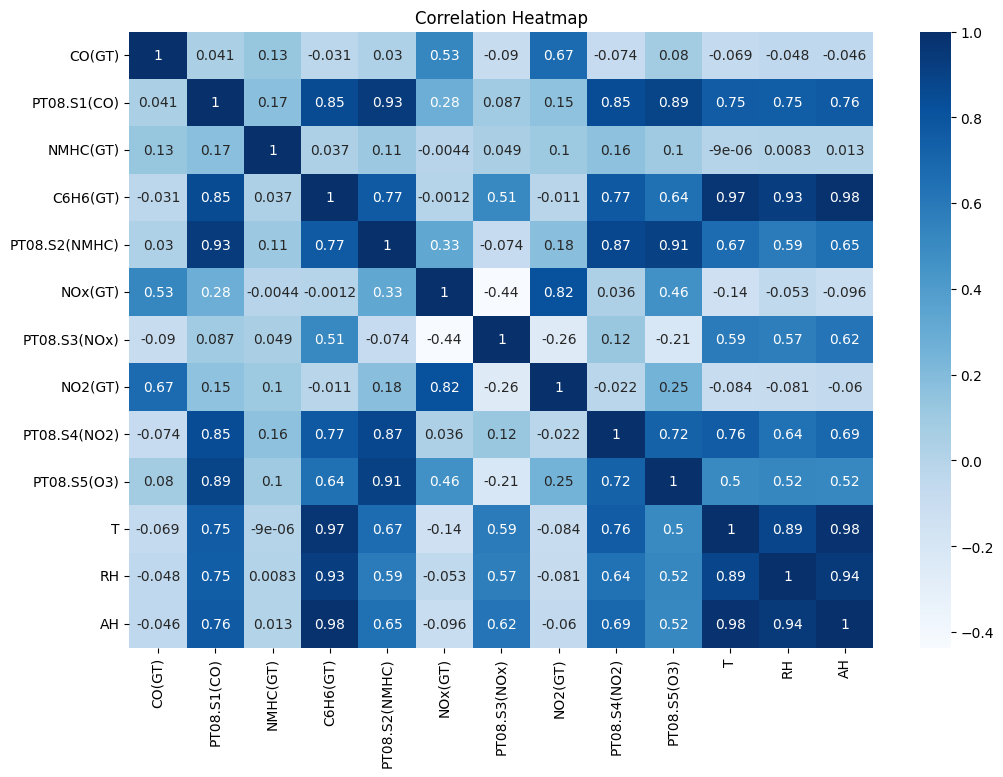

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

This section chooses the variable we are comparing.

In [18]:
y = df['CO(GT)']

This section sets up the next part of the model, removing CO(GT) and other data

In [19]:
X = df.drop(['CO(GT)', 'Date', 'Time'], axis=1)

This section prints out each variable to confirm they worked

In [20]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9357, 12)
y shape: (9357,)


This next section prepares the test/train set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)


This creates a pipeline with the linear regression model.

In [22]:
lr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LinearRegression())
    ])

This section trains the model

In [23]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

This section make our predictions

In [24]:
y_pred_train = lr_pipeline.predict(X_train)
y_pred_test = lr_pipeline.predict(X_test)

This section shows the root mean square error

In [25]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

This section shows the RMSE data

In [26]:
print("Linear Regression Train RMSE:", rmse_train)
print("Linear Regression Test RMSE:", rmse_test)

Linear Regression Train RMSE: 56.1934968028609
Linear Regression Test RMSE: 56.96870319148762


This imports necessary libraries

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

This section creates the pipieline with the Support Vector Machine

In [28]:
svr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svr', SVR())
    ])

This section prepares the GridSearch

In [29]:
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.5, 1],
    'svr__kernel': ['rbf']
}

This section executes the GridSearch

In [30]:
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1],
                         'svr__kernel': ['rbf']},
             scoring='neg_root_mean_squared_error', verbose=1)

This section identifies the best outcome

In [31]:
best_svr = grid_search.best_estimator_
y_pred_train_svr = best_svr.predict(X_train)
y_pred_test_svr = best_svr.predict(X_test)

This evaluates both models

In [32]:
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_pred_train_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))

This section prints the results

In [33]:
print("Best SVR Params:", grid_search.best_params_)
print("SVR Train RMSE:", rmse_train_svr)
print("SVR Test RMSE:", rmse_test_svr)

Best SVR Params: {'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'rbf'}
SVR Train RMSE: 59.99151837384492
SVR Test RMSE: 59.296564520632224


##Final Thoughts

In this case, the train model was slightly better, witha  .7 difference. Althought not as marked as with previous models in this course, every improvement in efficiency should be taken into consideration.